# Benchmarking Experiments for Extended K-Prototypes (Paper Versions)

Variations on the experimental structure of the original extension as presented for the undergraduate thesis of the author.

In [28]:
import os
import sys
current_dir = os.getcwd()

# Get the absolute path of the parent directory
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
sys.path.append(parent_dir)

from random import randint
from typing import Any, Optional, Callable

import numpy as np
import pandas as pd

from benchmark_extension import Experiment

Data generation has been changed to follow a probabilistic approach for the generation of the categorical and multi-valued attributes.  
  
Categorical attributes are sampled from a user-defined distribution of categorical items.  
  
Multi-valued attributes are sampled using a tree of conditional probability per cluster to simulate the way in which some items of multi-valued attributes tend to appear in common with others. This is preferred to repeating the approach pursued for categorical variables to better represent real-life conditions that practitioners may face.

In [29]:
sample_configuration = {
    'n_samples': 2000,
    'n_clusters': 3,
    'class_weights': [0.33, 0.33],
    # Numeric Features
    'n_numeric_features': 5,
    'separability': 3.0,
    'noise': 0.01,
    # Categroical Features
    'n_categorical_features': 5,
    'categorical_cardinalities': [6, 6, 6, 6, 6],
    'category_distributions':(  # One list per feature per cluster
        [
            [0.4, 0.4, 0.05, 0.05, 0.05],
            [0.4, 0.4, 0.05, 0.05, 0.05],
            [0.4, 0.4, 0.05, 0.05, 0.05],
            [0.4, 0.4, 0.05, 0.05, 0.05],
            [0.4, 0.4, 0.05, 0.05, 0.05]],
        [
            [0.05, 0.05, 0.4, 0.4, 0.05],
            [0.05, 0.05, 0.4, 0.4, 0.05],
            [0.05, 0.05, 0.4, 0.4, 0.05],
            [0.05, 0.05, 0.4, 0.4, 0.05],
            [0.05, 0.05, 0.4, 0.4, 0.05]],
        [
            [0.05, 0.05, 0.05, 0.05, 0.4],
            [0.05, 0.05, 0.05, 0.05, 0.4],
            [0.05, 0.05, 0.05, 0.05, 0.4],
            [0.05, 0.05, 0.05, 0.05, 0.4],
            [0.05, 0.05, 0.05, 0.05, 0.4]]
    ),
    # Multi-valued Features
    'n_multival_features': 5,
    'base_chances': (   # One list per feature per cluster
        [   
            [0.4, 0.4, 0.05, 0.05, 0.05],
            [0.4, 0.4, 0.05, 0.05, 0.05],
            [0.4, 0.4, 0.05, 0.05, 0.05],
            [0.4, 0.4, 0.05, 0.05, 0.05],
            [0.4, 0.4, 0.05, 0.05, 0.05]
        ],
        [
            [0.05, 0.05, 0.4, 0.4, 0.05],
            [0.05, 0.05, 0.4, 0.4, 0.05],
            [0.05, 0.05, 0.4, 0.4, 0.05],
            [0.05, 0.05, 0.4, 0.4, 0.05],
            [0.05, 0.05, 0.4, 0.4, 0.05]
        ],
        [
            [0.05, 0.05, 0.05, 0.05, 0.4],
            [0.05, 0.05, 0.05, 0.05, 0.4],
            [0.05, 0.05, 0.05, 0.05, 0.4],
            [0.05, 0.05, 0.05, 0.05, 0.4],
            [0.05, 0.05, 0.05, 0.05, 0.4]
        ]
    ),
    'conditional_probabilities': (
        [  # One dict per feature, per cluster
            {
                0: [0.04, 0.80, 0.04, 0.04, 0.04],
                1: [0.80, 0.04, 0.04, 0.04, 0.04]
            },
            {
                0: [0.04, 0.80, 0.04, 0.04, 0.04],
                1: [0.80, 0.04, 0.04, 0.04, 0.04]
            },
            {
                0: [0.04, 0.80, 0.04, 0.04, 0.04],
                1: [0.80, 0.04, 0.04, 0.04, 0.04]
            },
            {
                0: [0.04, 0.80, 0.04, 0.04, 0.04],
                1: [0.80, 0.04, 0.04, 0.04, 0.04]
            },
            {
                0: [0.04, 0.80, 0.04, 0.04, 0.04],
                1: [0.80, 0.04, 0.04, 0.04, 0.04]
            }],
        [
            {
                2: [0.04, 0.04, 0.04, 0.80, 0.04],
                3: [0.04, 0.04, 0.80, 0.04, 0.04],
            },
            {
                2: [0.04, 0.04, 0.04, 0.80, 0.04],
                3: [0.04, 0.04, 0.80, 0.04, 0.04],
            },
            {
                2: [0.04, 0.04, 0.04, 0.80, 0.04],
                3: [0.04, 0.04, 0.80, 0.04, 0.04],
            },
            {
                2: [0.04, 0.04, 0.04, 0.80, 0.04],
                3: [0.04, 0.04, 0.80, 0.04, 0.04],
            },
            {
                2: [0.04, 0.04, 0.04, 0.80, 0.04],
                3: [0.04, 0.04, 0.80, 0.04, 0.04],
            }],
        [
            {
                4: [0.04, 0.04, 0.04, 0.04, 0.04],
                5: [0.04, 0.04, 0.04, 0.04, 0.80]
            },
            {
                4: [0.04, 0.04, 0.04, 0.04, 0.04],
                5: [0.04, 0.04, 0.04, 0.04, 0.80]
            },
            {
                4: [0.04, 0.04, 0.04, 0.04, 0.04],
                5: [0.04, 0.04, 0.04, 0.04, 0.80]
            },
            {
                4: [0.04, 0.04, 0.04, 0.04, 0.04],
                5: [0.04, 0.04, 0.04, 0.04, 0.80]
            },
            {
                4: [0.04, 0.04, 0.04, 0.04, 0.04],
                5: [0.04, 0.04, 0.04, 0.04, 0.80]
            }]
    ),
    # Approach Settings
    'approach_settings': {
        'naive': {
            'gamma': None
        },
        'one-hot': {
            'gamma': None,
            'max_dummies': 100
        },
        'one-hot-pca': {
            'gamma': None,
            'reduced_dimensions': 0.25
        },
        'extended': {
            'gamma_c': 0.33,
            'gamma_m': 0.33,
            'theta': 0.001
        }
    }
}

The sample configuration includes a bi-modal distribution for each categorical attribute that modifies the modes for each cluster. Harder-to-cluster configurations where some elements are modal in more than one cluster or where some levels are never modal could be tried.

**Input Rules**:  

- Class weights should be of length `n_clusters - 1`. The missing weight will be calculated with `1 - sum(class_weights)`.

- Length of `categorical_cardinalities` equal to `n_categorical_features`.

- Length of `category_distributions` should be equal to `n_clusters`. Each item is a list of lists specifying a categorical distribution for each categorical attribute describing the categorical characteristics of the cluster.
  
- Each item in `category_distributions` should include a list per categorical attribute containing the sampling probabilities for each category (as defined in `categorical_cardinalities` minus one) in the attribute. The probabilities should sum up to less than one. The probability for the missing category will be calculated as `1 - sum(distribution)`.
  
- Length of `probability_trees` should be equal to `n_multival_features`.
  
- The probabilities of the children of each node in each ``tree`` of ``probability_trees`` should sum up to one. Rule does not apply to leafs.
  
- In `approach_settings`, the field `reduced_dimensions` in `one-hot-pca` must be a float in the open interval $(0, 1)$.
  
- In `approach_settings`, the field the gamma fields in `extended` must be floats in the interval $[0, 1)$ and not sum up to more than one. 

In [30]:
def sample_categorical_attributes(
        cluster_assignment_vector: np.ndarray[int],
        category_distributions: tuple[list[list[float]]],
        n_categorical_features: int,
        categorical_cardinalities: list[int],
        n_clusters: int,
        random_generator: np.random.Generator,
        round_digits: int = 5):
    """
    Use categorical distributions to sample the categorical attributes of
    a dataset. A category distribution is specified for each cluster and
    attribute pair.
    """

    # The expected structure of category distributions is
    # tuple (len n_clusters)
    #   [list(len n_categorical_features)
    #       [list(categorical_cardinality - 1)]
    #   ]
    # A tuple containing matrices of shape
    # (n_cat_features x (cardinality - 1))
    # ONLY IF THE CARDINALITY IS CONSTANT.
    # Generally, it is a list of lists defining probabilities.

    # Checks that everything should be the way it is
    if len(categorical_cardinalities) != n_categorical_features:
        raise ValueError("Mismatched categorical cardinalities "
                            f"({len(categorical_cardinalities)}) and number "
                            "of categorical features "
                            f"({n_categorical_features})")
    if len(category_distributions) != n_clusters:
        raise ValueError("Mismatched distributions "
                            f"({len(category_distributions)}) and clusters "
                            f"({n_clusters})")

    for distr in category_distributions:
        if len(distr) != n_categorical_features:
            raise ValueError("Probability distributions must be provided "
                                "for all categorical features "
                                f"({n_categorical_features}). Only "
                                f"{len(distr)} have been specified.")

        for i, var_distr in enumerate(distr):
            if len(var_distr) != (categorical_cardinalities[i]-1):
                raise ValueError("Probability distribution must include "
                                    "categorical_cardinalities - 1 values.")
            if round(sum(var_distr), round_digits) > 1:
                raise ValueError("Probability distribution must not sum "
                                    "up to more than one.")

    # Code
    output_columns = []

    # Check the cluster and get the respective prob distribution
    # Sample once from the multinomial. Use argmax to get the category
    def choice_func(i_cluster):
        return np.argmax(
            random_generator.multinomial(
                1,
                pvals=category_distributions[i_cluster][i_feature] +
                [np.round(
                    1-sum(
                        category_distributions[i_cluster][i_feature]),
                    round_digits)],
                size=1),
            axis=1)

    choice_func_vec = np.vectorize(choice_func)

    for i_feature in range(n_categorical_features):
        output_columns.append(choice_func_vec(cluster_assignment_vector))

    return np.stack(output_columns, axis=1)

In [31]:
cluster_array = np.array([0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=np.int64)

In [32]:
sample_categorical_attributes(cluster_assignment_vector=cluster_array,
                              category_distributions=sample_configuration['category_distributions'],
                              n_categorical_features=sample_configuration['n_categorical_features'],
                              categorical_cardinalities=sample_configuration['categorical_cardinalities'],
                              n_clusters=sample_configuration['n_clusters'],
                              random_generator=np.random.default_rng(42))

array([[5, 0, 1, 1, 4],
       [3, 2, 3, 3, 3],
       [2, 2, 2, 3, 0],
       [4, 5, 4, 5, 5],
       [2, 3, 2, 1, 2],
       [2, 1, 0, 4, 1],
       [0, 0, 0, 0, 0],
       [1, 1, 2, 1, 5],
       [1, 0, 0, 1, 1],
       [0, 0, 1, 1, 5],
       [0, 1, 4, 2, 0],
       [0, 1, 1, 1, 1],
       [1, 1, 0, 5, 1],
       [1, 4, 0, 0, 5],
       [1, 1, 0, 5, 1]], dtype=int64)

Now for the multi-valued attributes, as generated from probability trees.

In [33]:
from collections import defaultdict

base_chance = [0.05, 0.05, 0.4, 0.4, 0.05]

conditional_probabilities = defaultdict(lambda: base_chance+[round(1-sum(base_chance))])

specified_conditional_probabilities = {
    2: [0.04, 0.04, 0.04, 0.80, 0.04],
    3: [0.04, 0.04, 0.80, 0.04, 0.04]
}

conditional_probabilities.update(specified_conditional_probabilities)

In [34]:
conditional_probabilities[1]

[0.05, 0.05, 0.4, 0.4, 0.05, 0]

In [35]:
conditional_probabilities[2]

[0.04, 0.04, 0.04, 0.8, 0.04]

In [36]:
def sample_multival_once_iter(iterations: int,
                         base_chance: list[float],
                         conditional_probabilities: dict,
                         random_generator: np.random.Generator):
    choice = np.argmax(
        random_generator.multinomial(1,
            pvals=base_chance+[round(1-sum(base_chance))]
        )
    )
    choice_set = {choice}

    for _ in range(iterations):
        # Will get the base chance or the specified ones
        choice = np.argmax(
            random_generator.multinomial(1,
                pvals=conditional_probabilities[choice]+[
                    round(1-sum(conditional_probabilities[choice]))
                ]
            )
        )
        choice_set.add(choice)

    return choice_set

In [37]:
sample_multival_once_iter(iterations=10,
                     base_chance=base_chance,
                     conditional_probabilities=conditional_probabilities,
                     random_generator=np.random.default_rng(42))

{1, 2, 3}

In [38]:
def sample_multival_once_target(target: int,
                         base_chance: list[float],
                         conditional_probabilities: dict,
                         random_generator: np.random.Generator):
    choice = np.argmax(
        random_generator.multinomial(1,
            pvals=base_chance+[round(1-sum(base_chance))]
        )
    )
    choice_set = {choice}

    while len(choice_set) < target:
        # Will get the base chance or the specified ones
        choice = np.argmax(
            random_generator.multinomial(1,
                pvals=conditional_probabilities[choice]+[
                    round(1-sum(conditional_probabilities[choice]))
                ]
            )
        )
        choice_set.add(choice)

    return choice_set

In [39]:
sample_multival_once_target(target=4,
                     base_chance=base_chance,
                     conditional_probabilities=conditional_probabilities,
                     random_generator=np.random.default_rng(42))

{0, 1, 2, 3}

In [40]:
from copy import deepcopy

In [41]:
def sample_multival_attributes(
    cluster_assignment_vector: np.ndarray,
    n_clusters: int,
    n_multival_features: int,
    base_chances: list[list[float]],
    conditional_probabilities: list[dict],
    random_generator: np.random.Generator,
    iterations: Optional[int] = None,
    target_len: Optional[int] = None
) -> tuple[np.ndarray, list[dict]]:
    """Sample the multivalued attributes from probability distributions."""

    # Check input integrity
    if len(base_chances) != n_clusters:
        raise ValueError(
            "The iterable containing lists with the conditional "
            "probability distributions must be of length "
            f"equal to n_clusters ({n_clusters}).")
    # if both are None or specified
    if (iterations is None) == (target_len is None):
        raise ValueError("Arguments 'iterations' and 'target_len' are "
                            "mutually exclusive. Specify one or the other.")

    # Define this here so we do not have scope problems in the default dict
    def fixed_lambda(val):
        return lambda: val

    # Cache the p-dicts here for the function call below
    cluster_p_dicts = []
    for i_cluster in range(n_clusters):
        feature_dicts = []

        for i_feature in range(n_multival_features):
            base_chance = deepcopy(
                base_chances[i_cluster][i_feature]+[round(
                    1-sum(base_chances[i_cluster][i_feature]))
                ])
            p_dict = defaultdict(fixed_lambda(base_chance))

            p_dict.update(conditional_probabilities[i_cluster][i_feature])
            feature_dicts.append(p_dict)

        cluster_p_dicts.append(feature_dicts)

    # Vectorize the sampling function to create the features
    output_columns = []
    
    def iter_func(i_cl, i_feat):
        return sample_multival_once_iter(
            iterations=iterations,
            base_chance=base_chances[i_cl][i_feat],
            conditional_probabilities=cluster_p_dicts[i_cl][i_feat],
            random_generator=random_generator
        )
    
    def target_func(i_cl, i_feat):
        return sample_multival_once_target(
            target=target_len,
            base_chance=base_chances[i_cl][i_feat],
            conditional_probabilities=cluster_p_dicts[i_cl][i_feat],
            random_generator=random_generator
        )

    for i_feature in range(n_multival_features):
        if iterations:
            sampling_func = np.vectorize(iter_func)
        else:
            sampling_func = np.vectorize(target_func)
        
        output_columns.append(sampling_func(cluster_assignment_vector,
                                            i_feature))

    return np.stack(output_columns, axis=1)

In [42]:
out_cols = sample_multival_attributes(cluster_assignment_vector=[0, 0, 1, 1, 2],
                    n_clusters=sample_configuration['n_clusters'],
                    n_multival_features=sample_configuration['n_multival_features'],
                    base_chances=sample_configuration['base_chances'],
                    conditional_probabilities=sample_configuration['conditional_probabilities'],
                    iterations=4,
                    random_generator=np.random.default_rng(42))

out_cols

array([[{0, 1, 3}, {0, 1}, {0, 1}, {0, 1}, {0, 1}],
       [{0, 1, 2}, {0, 1}, {0, 1, 3, 5}, {0, 1, 4}, {0, 1, 5, 6}],
       [{0, 2, 3}, {2, 3}, {0, 2, 3}, {0, 2, 3}, {2, 3, 5}],
       [{2, 3}, {1, 2, 3}, {0, 2, 3, 5}, {2, 3}, {0, 2, 3}],
       [{4, 5}, {4, 5}, {4, 5}, {1, 4, 5, 6}, {4, 5}]], dtype=object)

In [43]:
sample_multival_attributes(cluster_assignment_vector=[0, 0, 1, 1, 2],
                    n_clusters=sample_configuration['n_clusters'],
                    n_multival_features=sample_configuration['n_multival_features'],
                    base_chances=sample_configuration['base_chances'],
                    conditional_probabilities=sample_configuration['conditional_probabilities'],
                    target_len=3,
                    random_generator=np.random.default_rng(42))

array([[{0, 1, 2}, {1, 4, 5}, {0, 1, 3}, {0, 1, 5}, {0, 3, 6}],
       [{0, 2, 3}, {0, 1, 4}, {0, 1, 2}, {0, 1, 5}, {0, 1, 2}],
       [{2, 3, 4}, {0, 2, 3}, {0, 2, 3}, {1, 2, 3}, {2, 3, 4}],
       [{2, 3, 5}, {2, 3, 4}, {2, 3, 4}, {1, 2, 3}, {2, 3, 5}],
       [{1, 4, 5}, {3, 4, 5}, {3, 4, 5}, {1, 4, 5}, {2, 4, 5}]],
      dtype=object)

**Explanation of the new data simulation**  
  
*Single-Valued Categorical* attribute are sampled from categorical distributions. For each pair of cluster and feature, a categorical distribution must be specified. Then, for each feature, values will be sampled from the categorical distribution specified for that cluster and feature.

*Multi-Valued Categorical* attribute are sampled using a similar strategy. In order to better reflect the possibility that certain items of a multi-valued categorical attribute tend to appear together, we specify both a "base" categorical distribution and "conditional" categorical distributions, joined in a tree-like fashion. For a given feature-cluster pair, an item is firstly sampled from the "base" distribution. If a "conditional" distribution has been specified for the chosen item, then the next item is sampled for that "conditional" distribution. If no conditional distribution has been specified, then the next item is sampled again from the "base" distribution. This process continues for a number of iterations or until the set has a target length.

## Exact modal set (medoid)

In [51]:
import scipy

m_val_array = out_cols[:,0].reshape(5, -1)

m_val_array

array([[{0, 1, 3}],
       [{0, 1, 2}],
       [{0, 2, 3}],
       [{2, 3}],
       [{4, 5}]], dtype=object)

In [52]:
from kmodes.util.dissim import jaccard_dissim_sets

In [53]:
# I wonder if there's a way to figure out how to find the argmin sum of
# distances using the vector-form instead of the square-form...

scipy.spatial.distance.pdist(m_val_array, jaccard_dissim_sets)

array([0.5       , 0.5       , 0.75      , 1.        , 0.5       ,
       0.75      , 1.        , 0.33333333, 1.        , 1.        ])

In [56]:
out_cols_np = []
n_rows = out_cols.shape[0]

for col in range(out_cols.shape[1]):
    out_cols_np.append(
        out_cols[:,col].reshape(5, -1)
    )

dist_result = map(lambda np_array: scipy.spatial.distance.pdist(
        np_array, jaccard_dissim_sets),
                    out_cols_np
                    )

sum(dist_result)

array([1.83333333, 4.        , 4.05      , 4.8       , 3.73333333,
       3.73333333, 4.2       , 1.75      , 4.75      , 4.8       ])

In [59]:
def determine_multival_medoid_index(out_cols_array: np.ndarray,
                                    dissim_func: Callable):
    out_cols_np = []
    n_rows = out_cols_array.shape[0]

    for col in range(out_cols_array.shape[1]):
        out_cols_np.append(
            out_cols[:, col].reshape(n_rows, -1)
        )

    dist_result = map(lambda np_array: scipy.spatial.distance.squareform(
                    scipy.spatial.distance.pdist(np_array, dissim_func)
                    ),
                    out_cols_np
                    )
    
    total_dist_matrix = sum(dist_result)

    # Check that the diagonal is only zeroes
    if not np.all(np.diagonal(total_dist_matrix) == 0):
        raise ValueError("Distance matrix diagonal is not all zeroes. Possible"
                         "problem with the multi-valued attributes.")

    # Axis is irrelevant because matrix is NxN symmetric
    return np.argmin(np.sum(total_dist_matrix, axis=0)), total_dist_matrix

In [60]:
determine_multival_medoid_index(out_cols, jaccard_dissim_sets)[0]

1

In [61]:
determine_multival_medoid_index(out_cols, jaccard_dissim_sets)[1]

array([[0.        , 1.83333333, 4.        , 4.05      , 4.8       ],
       [1.83333333, 0.        , 3.73333333, 3.73333333, 4.2       ],
       [4.        , 3.73333333, 0.        , 1.75      , 4.75      ],
       [4.05      , 3.73333333, 1.75      , 0.        , 4.8       ],
       [4.8       , 4.2       , 4.75      , 4.8       , 0.        ]])

#### Benchmark: Squareform Transformation vs Dense Representation

In [22]:
from itertools import combinations

In [23]:
def squared_to_condensed(i, j, n):
    assert i != j, "no diagonal indexes"
    if i < j:
        i, j = j, i     # Avoid redundancies
    return n*j - j*(j+1)//2 + i - 1 - j

def determine_dense_dist_indices(n_objects: int):
    non_diagonal_indexes = list(combinations(range(n_objects), 2))

    return (
        non_diagonal_indexes,
        list(map(
            lambda x: squared_to_condensed(x[0], x[1], n_objects),
            non_diagonal_indexes 
            )
        )
        )


In [24]:
tuples = determine_dense_dist_indices(6)[0]    # of length (n(n-1))/2
tuples

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (2, 3),
 (2, 4),
 (2, 5),
 (3, 4),
 (3, 5),
 (4, 5)]

In [49]:
def isin_array_element(array_element, item):
    return item in array_element

vectorized_func = np.vectorize(isin_array_element)

In [25]:
dist_indexes = determine_dense_dist_indices(6)[1]
dist_indexes

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [50]:
tuples_array = np.array(tuples, dtype="i,i")

tuples_array

array([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 2), (1, 3), (1, 4),
       (1, 5), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)],
      dtype=[('f0', '<i4'), ('f1', '<i4')])

In [51]:
vectorized_func(tuples_array, 1)

array([ True, False, False, False, False,  True,  True,  True,  True,
       False, False, False, False, False, False])

In [76]:
def squared_to_condensed(i, j, n):
    assert i != j, "no diagonal indexes"
    if i < j:
        i, j = j, i     # Avoid redundancies
    return n*j - j*(j+1)//2 + i - 1 - j


def determine_dense_dist_indices(n_objects: int):
    non_diagonal_indexes = list(combinations(range(n_objects), 2))

    return (
        non_diagonal_indexes,
        list(map(
            lambda x: squared_to_condensed(x[0], x[1], n_objects),
            non_diagonal_indexes 
            )
        )
        )

def object_index_to_distance(object_index: int,
                             pairwise_tuples: np.ndarray[tuple[int]],
                             distance_indices: np.ndarray[int],
                             dense_distance_vector: np.ndarray[float],
                             ) -> list[int]:
    contains_func = np.vectorize(lambda tupl, item: item in tupl)
    
    # Find the indices that correspond to a given item
    mask = contains_func(pairwise_tuples, object_index)
    object_indices = distance_indices[mask]

    # Reduce the distance vector to a sum of distances.
    return sum(dense_distance_vector[object_indices])


# Input is the dense vector representation sum for all attributes
def dist_sum_with_dense_vector_repr(dense_vector_dist: np.ndarray[float],
                                    n_objects: int,
                                    ) -> np.ndarray:    #1-d with len n_objects
    tuples_list, dist_indexes = determine_dense_dist_indices(n_objects)

    tuples_array = np.array(tuples_list, dtype="i,i")
    indexes_array = np.array(dist_indexes, dtype=np.int64)

    indexes_func = np.vectorize(lambda index: 
        object_index_to_distance(
            object_index=index,
            pairwise_tuples=tuples_array,
            distance_indices=indexes_array,
            dense_distance_vector=dense_vector_dist
            )
        )
    
    return indexes_func(np.arange(n_objects))

In [70]:
total_dense_distance = scipy.spatial.distance.squareform(determine_multival_medoid_index(out_cols, jaccard_dissim_sets)[1])
total_dense_distance

array([1.83333333, 4.        , 4.05      , 4.8       , 3.73333333,
       3.73333333, 4.2       , 1.75      , 4.75      , 4.8       ])

In [64]:
out_cols.shape[0]

5

In [78]:
dist_sum_with_dense_vector_repr(dense_vector_dist=total_dense_distance,
                                n_objects=out_cols.shape[0])

array([14.68333333, 13.5       , 14.23333333, 14.33333333, 18.55      ])

In [79]:
np.argmin(dist_sum_with_dense_vector_repr(dense_vector_dist=total_dense_distance,
                                          n_objects=out_cols.shape[0]))

1

In [92]:
def determine_multival_medoid_index_dense(out_cols_df: pd.DataFrame,
                                          dissim_func: Callable):
    out_cols_np = []
    n_rows = out_cols_df.shape[0]

    for col in out_cols_df.columns:
        out_cols_np.append(
            out_cols_df.loc[:, col].to_numpy().reshape((n_rows, -1))
        )

    dist_result = map(lambda np_array: 
                      scipy.spatial.distance.pdist(np_array, dissim_func),
                      out_cols_np
                    )

    total_dist_matrix = sum(dist_result)

    # Axis is irrelevant because matrix is NxN symmetric
    return np.argmin(dist_sum_with_dense_vector_repr(
        dense_vector_dist=total_dist_matrix,
        n_objects=n_rows)
        ), total_dist_matrix

In [93]:
determine_multival_medoid_index_dense(out_cols_df=out_cols,
                                      dissim_func=jaccard_dissim_sets)

(1,
 array([1.83333333, 4.        , 4.05      , 4.8       , 3.73333333,
        3.73333333, 4.2       , 1.75      , 4.75      , 4.8       ]))

In [94]:
determine_multival_medoid_index(out_cols_df=out_cols,
                                dissim_func=jaccard_dissim_sets)

(1,
 array([[0.        , 1.83333333, 4.        , 4.05      , 4.8       ],
        [1.83333333, 0.        , 3.73333333, 3.73333333, 4.2       ],
        [4.        , 3.73333333, 0.        , 1.75      , 4.75      ],
        [4.05      , 3.73333333, 1.75      , 0.        , 4.8       ],
        [4.8       , 4.2       , 4.75      , 4.8       , 0.        ]]))

In [95]:
np.random.default_rng(42).choice(3, 100)

array([0, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 2, 1, 0, 2, 1, 1, 1,
       0, 2, 2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 2, 0, 2, 2, 0, 1, 0, 2, 2, 1,
       0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 1, 0, 2, 2, 2, 2, 1, 2, 1, 0,
       2, 1, 0, 1, 2, 0, 1, 0, 2, 1, 0, 0, 1, 2, 2, 1, 0, 2, 1, 2, 0, 0,
       2, 2, 1, 2, 2, 1, 2, 0, 0, 2, 1, 0], dtype=int64)

In [99]:
from timeit import default_timer

In [107]:
dataset_sizes = list(range(100, 1100, 100))
square_result_time = []
dense_result_time = []

for size in dataset_sizes:
    cluster_vector = np.random.default_rng(42).choice(3, size)

    out_col_df = sample_multival_attributes(
                    cluster_assignment_vector=cluster_vector,
                    n_clusters=sample_configuration['n_clusters'],
                    n_multival_features=sample_configuration['n_multival_features'],
                    base_chances=sample_configuration['base_chances'],
                    conditional_probabilities=sample_configuration['conditional_probabilities'],
                    iterations=4,
                    random_generator=np.random.default_rng(42))

    start = default_timer()
    determine_multival_medoid_index(out_cols_df=out_col_df,
                                    dissim_func=jaccard_dissim_sets)
    end = default_timer()

    square_result_time.append(end - start)

    start = default_timer()
    determine_multival_medoid_index_dense(out_cols_df=out_col_df,
                                          dissim_func=jaccard_dissim_sets)
    end = default_timer()

    dense_result_time.append(end - start)

In [108]:
square_result_time

[0.43949519994203,
 2.337291399948299,
 3.9610179000301287,
 6.744739899993874,
 10.97181549994275,
 15.255597000010312,
 21.023654000018723,
 26.789970999932848,
 36.65643250010908,
 42.17384870001115]

In [109]:
dense_result_time

[0.6500585000030696,
 3.1744943000376225,
 6.917026200098917,
 13.212547900038771,
 24.51464529999066,
 39.624999699997716,
 61.37083390005864,
 100.44615850003902,
 123.28025940002408,
 165.2092228999827]

In [110]:
import seaborn as sns

c:\Users\manue\miniconda3\envs\ExtendedKproto\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\manue\miniconda3\envs\ExtendedKproto\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\manue\miniconda3\envs\ExtendedKproto\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\manue\miniconda3\envs\ExtendedKproto\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

<Axes: >

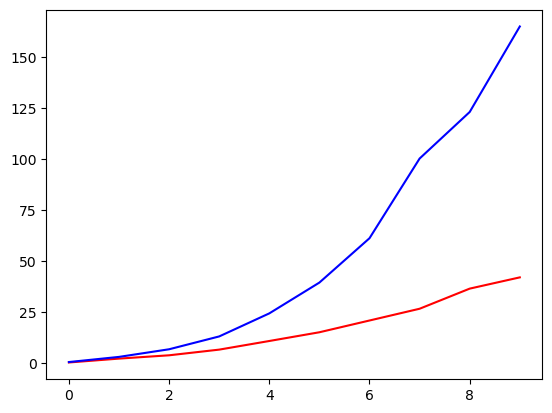

In [113]:
sns.lineplot(square_result_time, color='red')
sns.lineplot(dense_result_time, color='blue')

**Conclusion:** for the purposes of extensively calculating the sum of distances to all other objects, the squareform transformation is preferrable to finding the indexes for all pairwise distances in the dense vector per item. Welp! Doing some O notation calculations would have shown this before I had to code it all. The exercise in vectorization has been pretty nice though. If we only had to look up some specific subset of observations, using the dense form may be more memory efficient.

## Some Experimentation